In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json


In [31]:
# Caminho do arquivo JSON neste ambiente
file_path = "//content/TelecomX_Data.json"

# Carregar e normalizar os dados
with open(file_path, "r") as f:
    raw_data = json.load(f)

df = pd.json_normalize(raw_data, sep="_")

# Converter campos numéricos
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")

# Visualizar as primeiras linhas para confirmar
df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                 593.30  
1          Mailed check                    59.9                 542.40  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

<ipython-input-30-2433652237>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


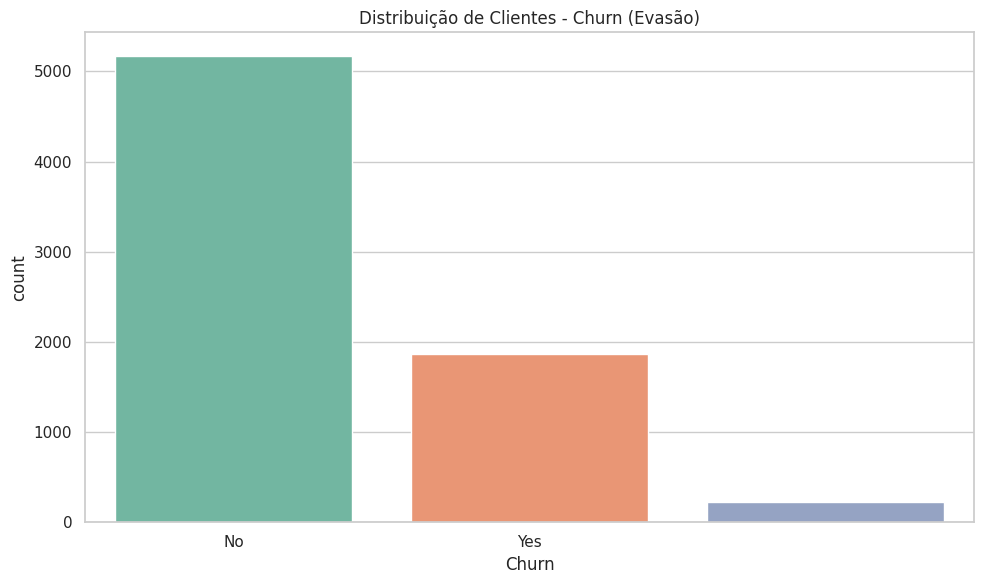

<ipython-input-30-2433652237>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account_Charges_Total", data=df, palette="Set3")


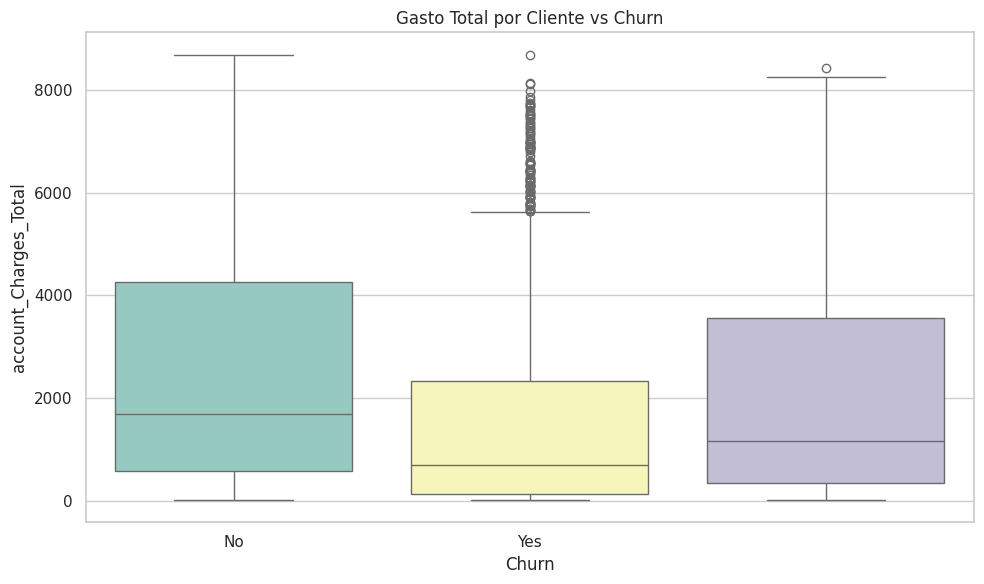

<ipython-input-30-2433652237>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer_tenure", data=df, palette="Set1")


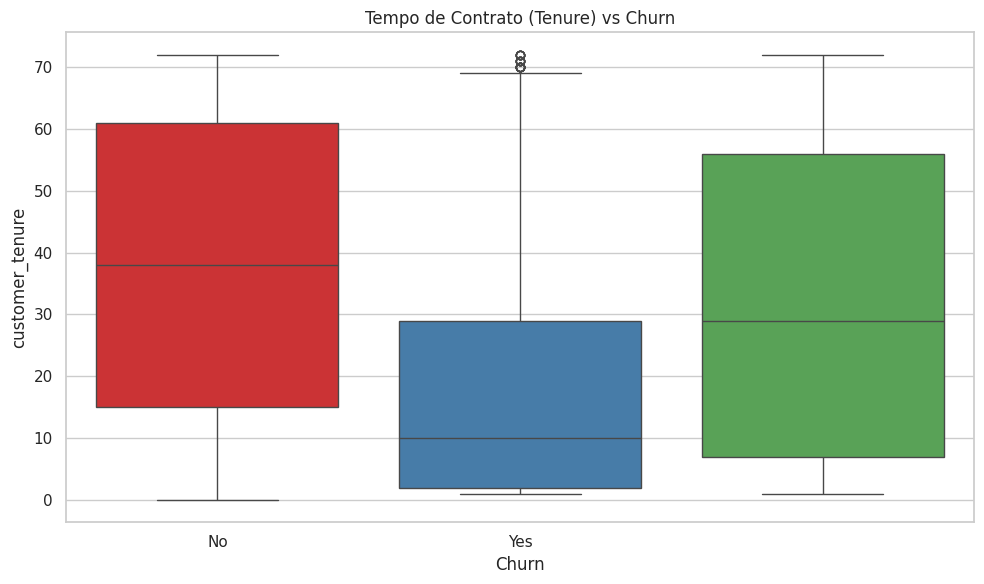

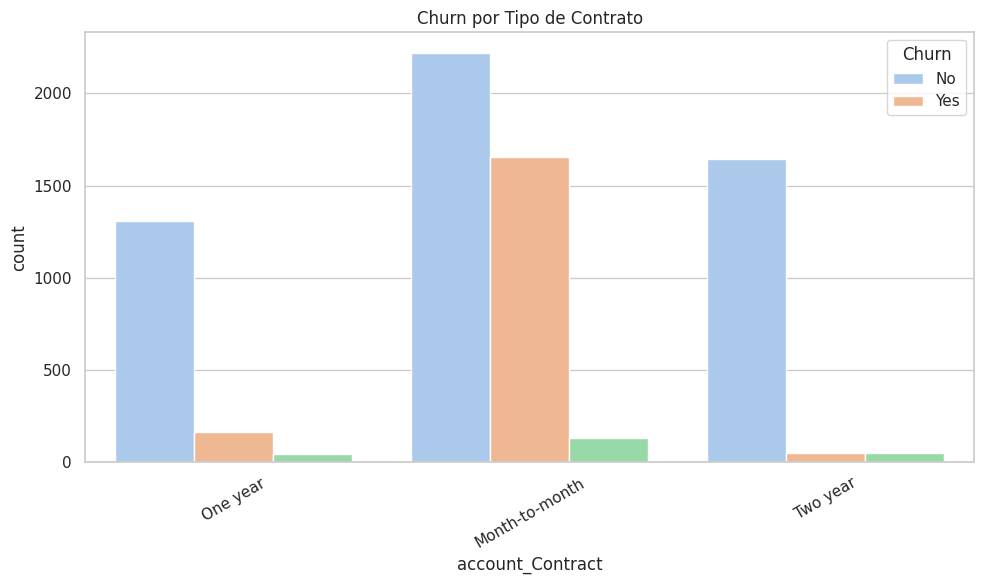

In [30]:
# Recarregar bibliotecas e dados após o reset do ambiente
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Reaplicar estilo
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Recarregar o JSON
file_path = "//content/TelecomX_Data.json"
with open(file_path, "r") as f:
    raw_data = json.load(f)

# Normalizar dados
df = pd.json_normalize(raw_data, sep="_")
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")

# 1. Distribuição de Churn
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribuição de Clientes - Churn (Evasão)")
plt.tight_layout()
plt.show()

# 2. Boxplot: Gasto Total vs Churn
sns.boxplot(x="Churn", y="account_Charges_Total", data=df, palette="Set3")
plt.title("Gasto Total por Cliente vs Churn")
plt.tight_layout()
plt.show()

# 3. Boxplot: Tempo de Contrato (tenure) vs Churn
sns.boxplot(x="Churn", y="customer_tenure", data=df, palette="Set1")
plt.title("Tempo de Contrato (Tenure) vs Churn")
plt.tight_layout()
plt.show()

# 4. Churn por Tipo de Contrato
sns.countplot(data=df, x="account_Contract", hue="Churn", palette="pastel")
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
